## Import Libraries and Load Data

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter
import matplotlib.pyplot as plt

In [43]:
import pandas as pd # Import the pandas library and assign it the alias 'pd'
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/fetal_health.csv')

In [45]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [46]:
print(data.head())

   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0

In [47]:
# Check class distribution
print("\nClass Distribution:")
print(data['fetal_health'].value_counts())


Class Distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64


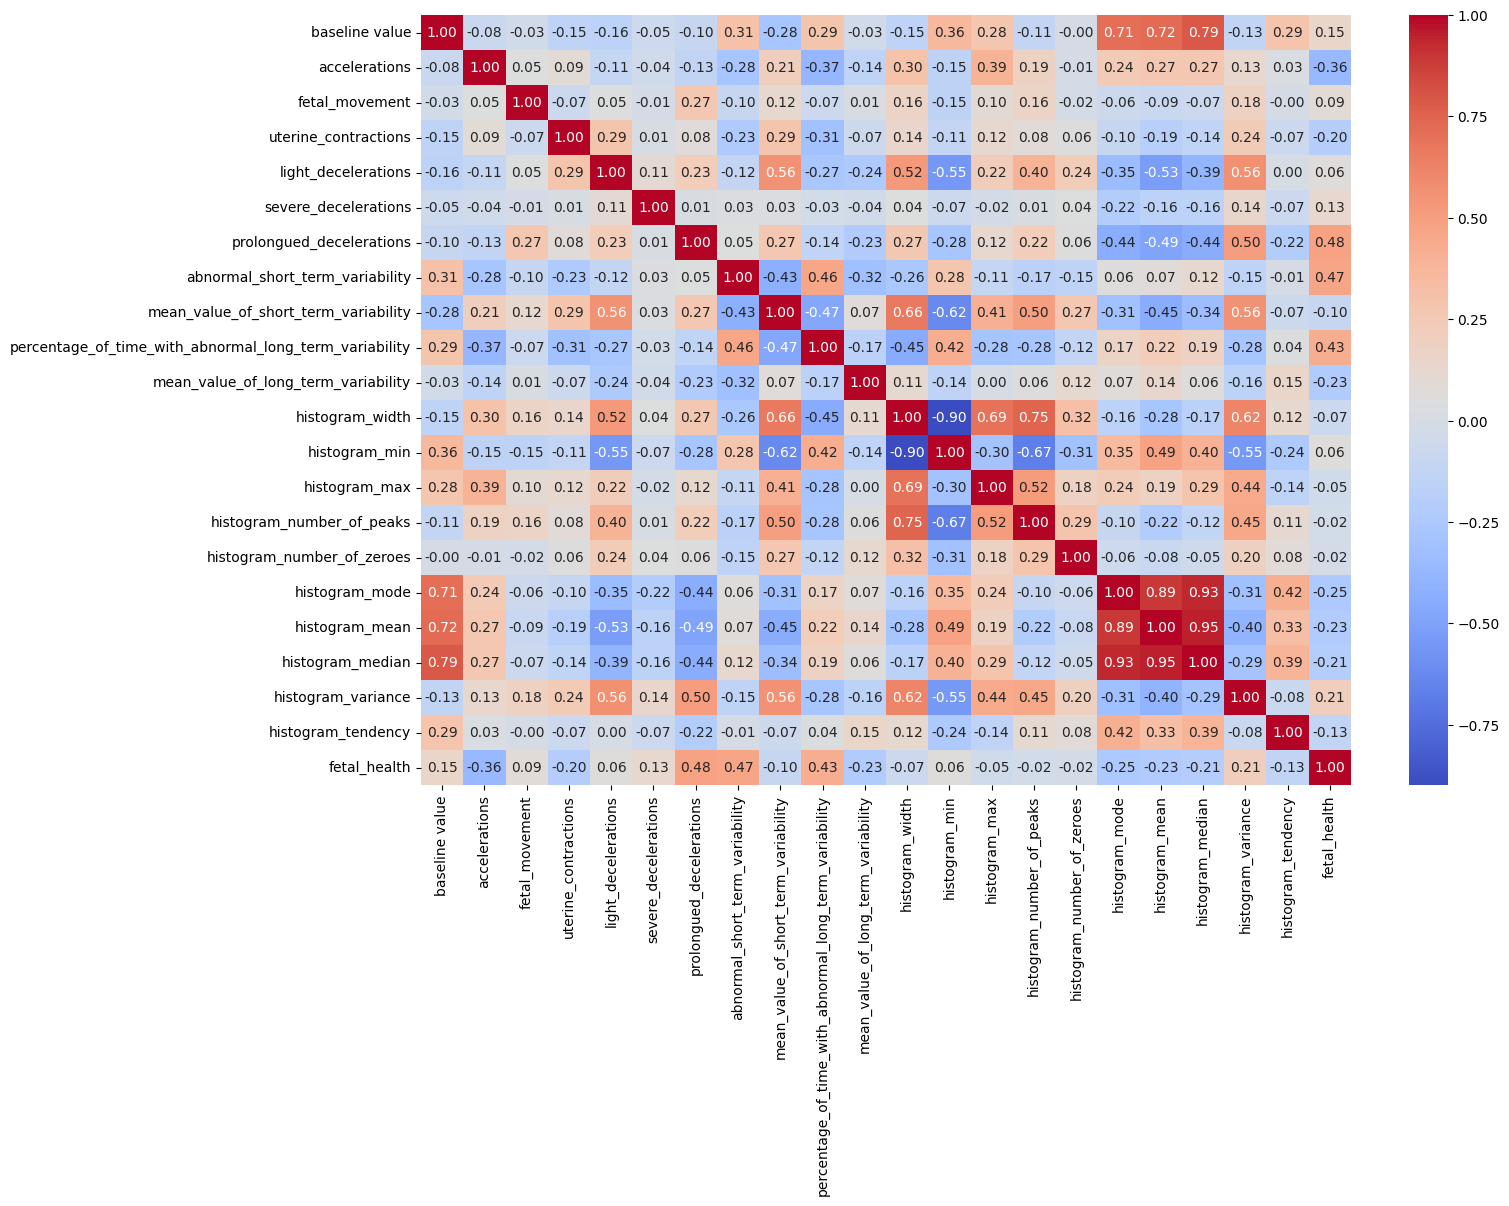

In [48]:
# Correlation analysis to identify redundant features
corr_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [49]:
# Feature selection using Recursive Feature Elimination (RFE) and RandomForestClassifier
X = data.drop(columns=['fetal_health'])
y = data['fetal_health']

In [50]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
# Train an initial Random Forest model for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

RandomForestClassifier(random_state=42)

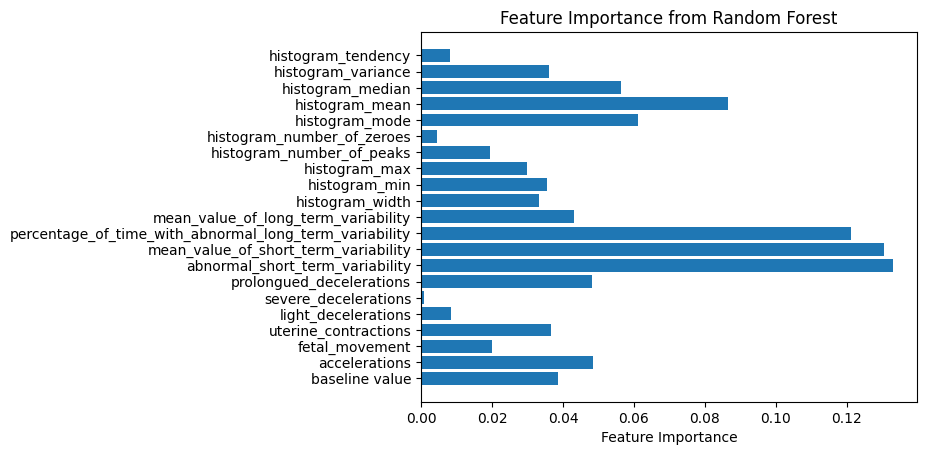

In [52]:
# Plot feature importance
importance = rf.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

In [53]:
# Use RFE (Recursive Feature Elimination) to select the best features
selector = RFE(rf, n_features_to_select=10)
selector = selector.fit(X_scaled, y)
selected_features = X.columns[selector.support_]

In [54]:
# Update the dataset with the selected features
X_selected = X[selected_features]

In [55]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

In [56]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [59]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train and evaluate Logistic Regression
lr = LogisticRegression(solver='newton-cg', max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Precision: {precision_score(y_test, y_pred_lr, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_lr, average='weighted')}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr, average='weighted')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_lr)}\n")

# Train and evaluate KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='weighted')}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn, average='weighted')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}\n")

# Train and evaluate Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(f"Precision: {precision_score(y_test, y_pred_nb, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_nb, average='weighted')}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb, average='weighted')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_nb)}\n")

# Train and evaluate SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Precision: {precision_score(y_test, y_pred_svm, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_svm, average='weighted')}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm, average='weighted')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svm)}\n")

# Train and evaluate Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"Precision: {precision_score(y_test, y_pred_dt, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_dt, average='weighted')}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt, average='weighted')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_dt)}\n")


Logistic Regression Evaluation
Accuracy: 0.7683786505538771
Precision: 0.7718758760023221
Recall: 0.7683786505538771
F1-Score: 0.7691391174759755
Confusion Matrix:
[[264  57  32]
 [ 43 245  29]
 [ 21  48 254]]

KNN Evaluation
Accuracy: 0.9274924471299094
Precision: 0.9321880566142831
Recall: 0.9274924471299094
F1-Score: 0.927213030340103
Confusion Matrix:
[[298  49   6]
 [  8 303   6]
 [  0   3 320]]

Naive Bayes Evaluation
Accuracy: 0.7754279959718026
Precision: 0.8012164941133718
Recall: 0.7754279959718026
F1-Score: 0.7777700309125247
Confusion Matrix:
[[270  63  20]
 [ 30 278   9]
 [ 13  88 222]]

SVM Evaluation
Accuracy: 0.8147029204431017
Precision: 0.82383708875507
Recall: 0.8147029204431017
F1-Score: 0.816156206075413
Confusion Matrix:
[[270  65  18]
 [ 34 271  12]
 [ 14  41 268]]

Decision Tree Evaluation
Accuracy: 0.9506545820745217
Precision: 0.9509949188573127
Recall: 0.9506545820745217
F1-Score: 0.9506290283851859
Confusion Matrix:
[[325  26   2]
 [ 14 299   4]
 [  1   2 32

# Ensemble Models

In [60]:
# Import necessary libraries for ensemble models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train and evaluate Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted')}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='weighted')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}\n")

# Train and evaluate Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb)}")
print(f"Precision: {precision_score(y_test, y_pred_gb, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_gb, average='weighted')}")
print(f"F1-Score: {f1_score(y_test, y_pred_gb, average='weighted')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_gb)}\n")

# Train and evaluate AdaBoost
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
y_pred_ab = ab.predict(X_test)

print("AdaBoost Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ab)}")
print(f"Precision: {precision_score(y_test, y_pred_ab, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_ab, average='weighted')}")
print(f"F1-Score: {f1_score(y_test, y_pred_ab, average='weighted')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_ab)}\n")

# Train and evaluate LightGBM
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

print("LightGBM Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgbm)}")
print(f"Precision: {precision_score(y_test, y_pred_lgbm, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_lgbm, average='weighted')}")
print(f"F1-Score: {f1_score(y_test, y_pred_lgbm, average='weighted')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_lgbm)}\n")


Random Forest Evaluation
Accuracy: 0.9707955689828801
Precision: 0.9718485927783086
Recall: 0.9707955689828801
F1-Score: 0.9708145609983126
Confusion Matrix:
[[331  20   2]
 [  2 312   3]
 [  0   2 321]]

Gradient Boosting Evaluation
Accuracy: 0.9566968781470292
Precision: 0.9569557027723948
Recall: 0.9566968781470292
F1-Score: 0.956644163744035
Confusion Matrix:
[[330  21   2]
 [  9 300   8]
 [  1   2 320]]

AdaBoost Evaluation
Accuracy: 0.8761329305135952
Precision: 0.8806653453622456
Recall: 0.8761329305135952
F1-Score: 0.8767101084249425
Confusion Matrix:
[[280  70   3]
 [ 33 282   2]
 [  9   6 308]]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2542
[LightGBM] [Info] Number of data points in the train set: 3972, number of used features: 10
[LightGBM] [Info] Start training fr

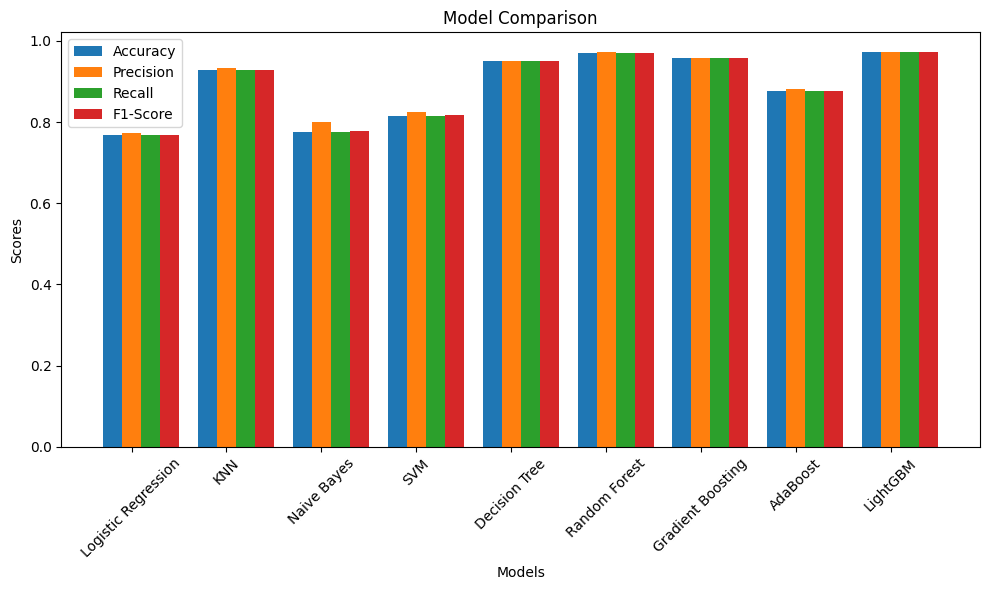

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Collect metrics for comparison
models = ['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'LightGBM']
accuracy = [
    accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_gb), accuracy_score(y_test, y_pred_ab), accuracy_score(y_test, y_pred_lgbm)
]
precision = [
    precision_score(y_test, y_pred_lr, average='weighted'), precision_score(y_test, y_pred_knn, average='weighted'),
    precision_score(y_test, y_pred_nb, average='weighted'), precision_score(y_test, y_pred_svm, average='weighted'),
    precision_score(y_test, y_pred_dt, average='weighted'), precision_score(y_test, y_pred_rf, average='weighted'),
    precision_score(y_test, y_pred_gb, average='weighted'), precision_score(y_test, y_pred_ab, average='weighted'),
    precision_score(y_test, y_pred_lgbm, average='weighted')
]
recall = [
    recall_score(y_test, y_pred_lr, average='weighted'), recall_score(y_test, y_pred_knn, average='weighted'),
    recall_score(y_test, y_pred_nb, average='weighted'), recall_score(y_test, y_pred_svm, average='weighted'),
    recall_score(y_test, y_pred_dt, average='weighted'), recall_score(y_test, y_pred_rf, average='weighted'),
    recall_score(y_test, y_pred_gb, average='weighted'), recall_score(y_test, y_pred_ab, average='weighted'),
    recall_score(y_test, y_pred_lgbm, average='weighted')
]
f1_score_vals = [
    f1_score(y_test, y_pred_lr, average='weighted'), f1_score(y_test, y_pred_knn, average='weighted'),
    f1_score(y_test, y_pred_nb, average='weighted'), f1_score(y_test, y_pred_svm, average='weighted'),
    f1_score(y_test, y_pred_dt, average='weighted'), f1_score(y_test, y_pred_rf, average='weighted'),
    f1_score(y_test, y_pred_gb, average='weighted'), f1_score(y_test, y_pred_ab, average='weighted'),
    f1_score(y_test, y_pred_lgbm, average='weighted')
]

# Plot comparison
x = np.arange(len(models))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
ax.bar(x - bar_width, accuracy, bar_width, label='Accuracy')
ax.bar(x, precision, bar_width, label='Precision')
ax.bar(x + bar_width, recall, bar_width, label='Recall')
ax.bar(x + 2*bar_width, f1_score_vals, bar_width, label='F1-Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()
